# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

In [2]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0.5, 0, 'Age')

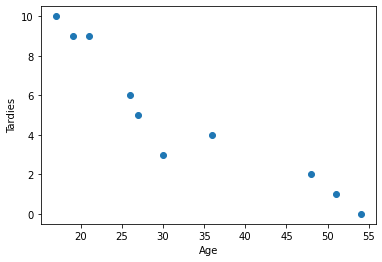

In [4]:
import matplotlib.pyplot as plt
plt.scatter(student_data["X"],student_data["Y"])
plt.ylabel("Tardies")
plt.xlabel("Age")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
student_data.corr() 

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


<AxesSubplot:>

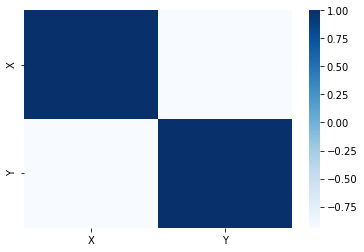

In [6]:
import seaborn as sns
sns.heatmap(student_data.corr(), cmap = "Blues")

In [7]:
student_data.cov() #

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
from scipy import stats

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
X = student_data["X"].values.reshape(-1, 1) #hay que pasarle una array y hacemos lo de reshape para que sea de dos dimensiones (Que es un requisito)
y = student_data["Y"]

In [12]:
lr.fit(X,y)

LinearRegression()

In [15]:
lr.score(X,y) #This result is the R2, which is very close to 1, we can say that age is a good predictor of tardiness

0.8820265558250109

In [16]:
lr.predict(X) #these are the predicted values

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

Plot your regression model on your scatter plot.

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y'>

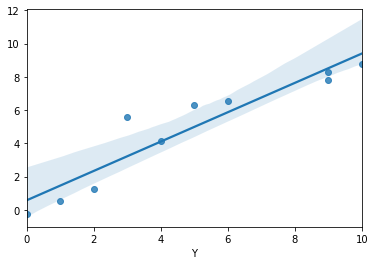

In [18]:
sns.regplot(y, lr.predict(X)) 

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [32]:
#See my comments next to the code 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
import pandas as pd

In [20]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


<AxesSubplot:>

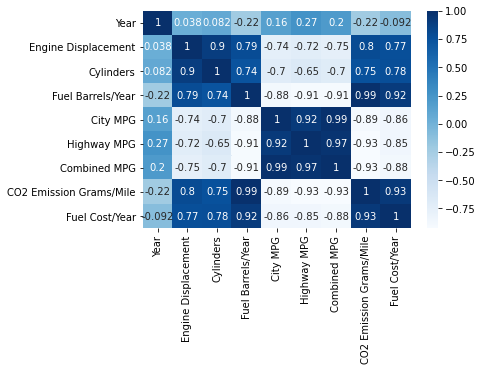

In [23]:
sns.heatmap(vehicles.corr(), annot = True, cmap = "Blues") 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
import statsmodels.api as sm

In [25]:
#Método 1 
X = sm.add_constant(vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]])
y = vehicles["CO2 Emission Grams/Mile"]

In [26]:
model = sm.OLS(y,X).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [27]:
model.summary() #el R2 es muy alto,casi igual a 1, lo que nos dice que con este modelo podemos predecir las emisiones de CO2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                             21:50:52   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Método 2
lr = LinearRegression()

In [29]:
X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

In [30]:
lr.fit(X,y)

LinearRegression()

In [31]:
lr.score(X,y)

0.9808734920269122

In [32]:
lr.predict(X)

array([522.03038361, 671.00105318, 552.68495072, ..., 230.01342446,
       229.69280773, 239.33283552])

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [33]:
parties = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

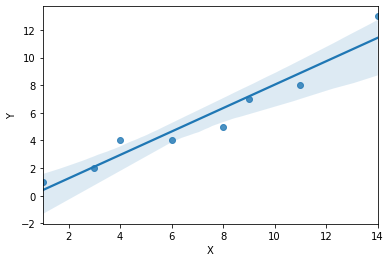

In [34]:
sns.regplot(parties["X"],parties["Y"])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [35]:
lr = LinearRegression()

In [36]:
X = parties["X"].values.reshape(-1, 1) #hay que pasarle una array y hacemos lo de reshape para que sea de dos dimensiones (Que es un requisito)
y = parties["Y"]

In [37]:
lr.fit(X,y)

LinearRegression()

In [38]:
lr.score(X,y)

0.9316696375519905

In [39]:
lr.predict(X)

array([ 0.40909091,  2.10606061,  2.95454545,  4.65151515,  6.34848485,
        7.1969697 ,  8.89393939, 11.43939394])

In [42]:
stats.linregress(parties["X"].values,parties["Y"].)

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [43]:
#I do see some "problematic points", I delete them 

parties2 = pd.DataFrame({'X': [1,3,6,8,9,11], 'Y': [1,2,4,5,7,8]})

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

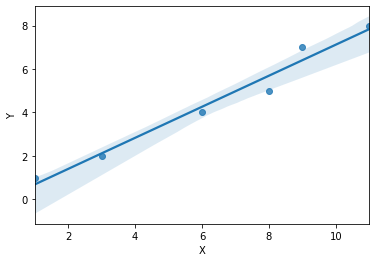

In [44]:
sns.regplot(parties2["X"],parties2["Y"])

In [46]:
X = parties2["X"].values.reshape(-1, 1) #hay que pasarle una array y hacemos lo de reshape para que sea de dos dimensiones (Que es un requisito)
y = parties2["Y"].values

In [47]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [48]:
lr.score(X,y) #el R2 ha mejorado un poquito 

0.9723364485981308

In [53]:
lr.predict(X)

array([0.68691589, 2.11682243, 4.26168224, 5.69158879, 6.40654206,
       7.8364486 ])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [64]:
#al quitar los outliers la pendiente de mi línea ha bajado, lo vemos en el plot y lo vemos en los resultados: ha pasado de 0,84 a 0,71, tb ha disminuido mi standard error de 0,09 a 0,03

In [49]:
stats.linregress(parties2["X"].values,parties2["Y"].values) #el lr.score es el rvalue al cuadrado.

LinregressResult(slope=0.7149532710280374, intercept=-0.028037383177569986, rvalue=0.9860712188265768, pvalue=0.0002896652494667462, stderr=0.06029667243254201)

In [51]:
def predict(x):
    return (0.7149532710280374) * x -0.028037383177569986 #con esta función poderíamos predecir nuestra "y"

In [52]:
predict(1)

0.6869158878504674